In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el modelo guardado
model = tf.keras.models.load_model('./modelo_clasificacion_frutas.h5')
print("Modelo cargado exitosamente.")

Modelo cargado exitosamente.


In [3]:
# Ruta de la imagen de prueba
img_path = 'tomate2.jpg'

In [4]:
# Cargar y preprocesar la imagen
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convierte a arreglo de NumPy
img_array = np.expand_dims(img_array, axis=0)  # Añade una dimensión para batch
img_array /= 255.0  # Normaliza como en el entrenamiento

In [5]:
# Realizar la predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Clase con la probabilidad más alta

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


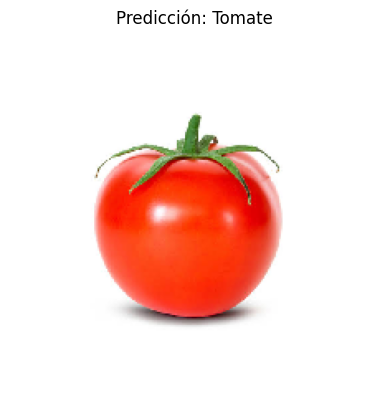

In [6]:
# Mapeo de nombre de las clases
class_names = ['Manzana', 'Platano', 'Naranja', 'Tomate', 'Manzana podrida', 'Platano podrido', 'Naranja podrida', 'Tomate podrido']

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.title(f'Predicción: {class_names[predicted_class]}')
plt.axis('off')
plt.show()

In [7]:
print("Probabilidades de predicción:", predictions[0])

Probabilidades de predicción: [1.3042964e-27 4.4159395e-23 8.6515692e-37 6.1549646e-01 7.1898591e-20
 4.6970724e-21 1.0098820e-14 3.8450354e-01]
